In [1]:
from tensorflow import keras

2022-08-16 23:42:55.167472: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 23:42:55.217239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 23:42:55.217259: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
input_layer = keras.Input(shape=(5,), name='sensory')
inner_layer = keras.layers.Dense(2, activation='tanh', name='internal')(input_layer)
block_1 = keras.layers.Concatenate(axis=1)([input_layer, inner_layer])
output_layer = keras.layers.Dense(3, activation='tanh', name='output')(block_1)
nn = keras.Model(inputs=[input_layer], outputs=[output_layer])

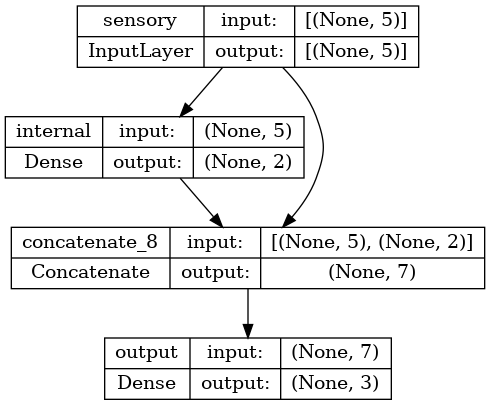

In [20]:
keras.utils.plot_model(nn, show_shapes=True)

In [21]:
from evolution import initialize_coordinates, create_population
%load_ext autoreload
%autoreload 2

In [22]:
POP_SIZE = 32
MAXX = 150
MAXY = 150

LIFETIME = 10
NUM_GENERATIONS = 10

In [23]:
coordinates = initialize_coordinates(pop_size=POP_SIZE, maxX=MAXX, maxY=MAXY)
print(coordinates)

[(121, 44), (10, 87), (82, 83), (106, 140), (78, 50), (139, 132), (103, 100), (54, 0), (101, 9), (146, 26), (76, 117), (132, 111), (73, 95), (128, 79), (84, 141), (49, 21), (3, 118), (130, 44), (56, 15), (128, 13), (146, 14), (49, 78), (113, 63), (143, 119), (41, 19), (85, 29), (142, 28), (49, 23), (97, 15), (11, 3), (47, 145), (102, 42)]


In [24]:
population = create_population(coordinates=coordinates, lifetime=LIFETIME)
print(population)

[<individual.Individual object at 0x7f53c0365430>, <individual.Individual object at 0x7f53a184a850>, <individual.Individual object at 0x7f53fa536fa0>, <individual.Individual object at 0x7f53a1858ca0>, <individual.Individual object at 0x7f53a18b3550>, <individual.Individual object at 0x7f53fa9b31f0>, <individual.Individual object at 0x7f53a171ed30>, <individual.Individual object at 0x7f53a1721730>, <individual.Individual object at 0x7f53a18b04c0>, <individual.Individual object at 0x7f53a172a5e0>, <individual.Individual object at 0x7f53a172aa30>, <individual.Individual object at 0x7f53a17304c0>, <individual.Individual object at 0x7f53a1730a90>, <individual.Individual object at 0x7f53a173b340>, <individual.Individual object at 0x7f53a173b790>, <individual.Individual object at 0x7f53a16c21c0>, <individual.Individual object at 0x7f53a1726e20>, <individual.Individual object at 0x7f53a16c41c0>, <individual.Individual object at 0x7f53a16c4ca0>, <individual.Individual object at 0x7f53a16cca30>,

In [26]:
for gen_i in range(NUM_GENERATIONS):
    for step_i in range(LIFETIME):
        for ind in population:
            input_vector = ind.sense_env(world_size=(MAXY, MAXX), mates_coordinates=coordinates, heat_sources=[])
            ind.take_step(input_vector)
        print(f"End of step {step_i} in gen {gen_i}")

End of step 0 in gen 0
End of step 1 in gen 0
End of step 2 in gen 0
End of step 3 in gen 0
End of step 4 in gen 0
End of step 5 in gen 0
End of step 6 in gen 0
End of step 7 in gen 0
End of step 8 in gen 0
End of step 9 in gen 0
End of step 0 in gen 1
End of step 1 in gen 1
End of step 2 in gen 1
End of step 3 in gen 1
End of step 4 in gen 1
End of step 5 in gen 1
End of step 6 in gen 1
End of step 7 in gen 1
End of step 8 in gen 1
End of step 9 in gen 1
End of step 0 in gen 2
End of step 1 in gen 2
End of step 2 in gen 2
End of step 3 in gen 2
End of step 4 in gen 2
End of step 5 in gen 2
End of step 6 in gen 2
End of step 7 in gen 2
End of step 8 in gen 2
End of step 9 in gen 2
End of step 0 in gen 3
End of step 1 in gen 3
End of step 2 in gen 3
End of step 3 in gen 3
End of step 4 in gen 3
End of step 5 in gen 3
End of step 6 in gen 3
End of step 7 in gen 3
End of step 8 in gen 3
End of step 9 in gen 3
End of step 0 in gen 4
End of step 1 in gen 4
End of step 2 in gen 4
End of step

KeyboardInterrupt: 

In [50]:
ind.brain.nn.predict(input_vector)[0]

1/1 [==============================] - 0s 11ms/step


array([ 1., -1.,  1.], dtype=float32)